In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [47]:
##### Minimizations 2024_04_05_Wilks_varying_NP_0.6732
h_hat1 = np.array([6.765064e-01 , 6.674860e-01 , 6.742340e-01 , 6.733586e-01 , 6.740553e-01 , 6.764795e-01 , 6.750312e-01 , 6.727088e-01 , 6.745192e-01 , 6.690889e-01 , 6.796196e-01 , 6.764383e-01 , 6.789773e-01 , 6.750499e-01 , 6.644589e-01 , 6.654841e-01 , 6.651847e-01 , 6.768252e-01 , 6.743459e-01 , 6.764412e-01 , 6.800893e-01 , 6.649543e-01 , 6.689962e-01 , 6.782803e-01 , 6.793994e-01 , 6.719812e-01 , 6.781198e-01 , 6.740928e-01 , 6.682156e-01 , 6.708741e-01 , 6.615431e-01 , 6.802010e-01 , 6.688245e-01 , 6.830381e-01 , 6.721669e-01 , 6.717505e-01 , 6.764622e-01 , 6.676947e-01 , 6.796943e-01 , 6.742238e-01 , 6.832667e-01 , 6.688133e-01 , 6.718011e-01 , 6.823242e-01 , 6.739374e-01 , 6.688343e-01 , 6.621172e-01 , 6.664234e-01 , 6.808253e-01 , 6.782069e-01 , 6.626634e-01 , 6.827241e-01 , 6.767564e-01 , 6.749380e-01 , 6.658366e-01 , 6.773503e-01 , 6.651546e-01 , 6.724760e-01 , 6.701135e-01 , 6.751873e-01 , 6.774852e-01 , 6.674388e-01 , 6.612984e-01 , 6.761289e-01 , 6.761435e-01 , 6.763590e-01 , 6.704405e-01 , 6.743494e-01 , 6.695949e-01 , 6.607768e-01 , 6.704242e-01 , 6.694506e-01 , 6.766526e-01 , 6.715732e-01 , 6.755939e-01 , 6.783236e-01 , 6.734355e-01 , 6.718651e-01 , 6.671842e-01 , 6.747898e-01 , 6.678173e-01 , 6.740260e-01 , 6.792604e-01 , 6.698417e-01 , 6.751149e-01 , 6.708029e-01 , 6.717384e-01 , 6.659046e-01 , 6.642620e-01 , 6.660327e-01 , 6.770848e-01 , 6.771492e-01 , 6.794163e-01 , 6.675870e-01 , 6.778542e-01 , 6.657276e-01 , 6.678225e-01 , 6.773028e-01 , 6.728509e-01 , 6.703700e-01])
lnL_hat1 = -np.array([332.81, 301.30, 282.26, 345.92, 304.50, 296.69, 290.29, 300.44, 299.93, 331.87, 301.51, 330.50, 304.58, 330.83, 307.36, 323.08, 291.30, 281.81, 313.17, 299.25, 315.91, 298.23, 273.29, 322.23, 329.94, 338.02, 306.27, 299.76, 287.63, 299.79, 303.00, 302.27, 298.48, 279.33, 303.78, 299.24, 292.40, 284.77, 308.21, 316.62, 301.37, 321.03, 290.91, 297.11, 303.63, 303.66, 327.91, 309.00, 298.80, 305.60, 299.56, 328.55, 281.32, 283.33, 295.14, 303.00, 285.32, 297.21, 311.90, 312.05, 314.98, 305.35, 322.73, 301.03, 285.63, 308.84, 292.96, 286.26, 306.33, 284.30, 308.19, 294.93, 315.67, 312.40, 304.89, 313.46, 297.53, 287.82, 318.51, 269.66, 304.28, 268.12, 303.60, 289.61, 329.99, 321.93, 307.65, 279.15, 321.64, 297.82, 333.40, 318.96, 298.33, 292.40, 307.56, 294.99, 266.94, 298.32, 315.56, 290.89])
lnL_tru = -np.array([332.96, 301.67, 282.27, 345.96, 304.52, 296.80, 290.31, 300.55, 299.97, 332.14, 302.20, 330.62, 305.05, 330.97, 308.20, 323.74, 292.00, 281.97, 313.18, 299.36, 316.70, 299.49, 273.48, 322.53, 330.37, 338.04, 306.52, 299.84, 288.08, 299.86, 304.84, 302.73, 298.93, 280.45, 303.86, 299.29, 292.49, 285.15, 308.68, 316.74, 302.66, 321.20, 290.95, 298.05, 303.71, 303.88, 329.28, 309.50, 299.41, 306.09, 300.73, 329.71, 281.51, 283.36, 296.35, 303.22, 286.06, 297.22, 312.01, 312.08, 315.15, 305.87, 324.60, 301.16, 286.18, 308.97, 293.06, 286.31, 306.48, 286.21, 309.09, 295.19, 315.80, 312.47, 305.13, 313.90, 297.56, 287.84, 318.90, 269.67, 304.55, 268.12, 304.11, 290.26, 330.09, 321.99, 307.73, 280.06, 322.54, 298.38, 333.72, 319.37, 298.75, 292.73, 307.84, 295.71, 267.65, 298.48, 315.73, 290.97])

##### Minimizations 2024_04_14_Wilks_varying_NP_m_ncdm_0.06_XX_true
h_hat2= np.array([6.770557e-01 , 6.671123e-01 , 6.744678e-01 , 6.718081e-01 , 6.737838e-01 , 6.774779e-01 , 6.750129e-01 , 6.727294e-01 , 6.748832e-01 , 6.693067e-01 , 6.825887e-01 , 6.760156e-01 , 6.796105e-01 , 6.757102e-01 , 6.655830e-01 , 6.645571e-01 , 6.639876e-01 , 6.767402e-01 , 6.745149e-01 , 6.759841e-01 , 6.812927e-01 , 6.643040e-01 , 6.697178e-01 , 6.788780e-01 , 6.798135e-01 , 6.717524e-01 , 6.786487e-01 , 6.739870e-01 , 6.684361e-01 , 6.705189e-01 , 6.589928e-01 , 6.803809e-01 , 6.682409e-01 , 6.831603e-01 , 6.730438e-01 , 6.713998e-01 , 6.767597e-01 , 6.671778e-01 , 6.804561e-01 , 6.761206e-01 , 6.844260e-01 , 6.685991e-01 , 6.712789e-01 , 6.833138e-01 , 6.737519e-01 , 6.688818e-01 , 6.612557e-01 , 6.663678e-01 , 6.814757e-01 , 6.792662e-01 , 6.627353e-01 , 6.841254e-01 , 6.765056e-01 , 6.750529e-01 , 6.656688e-01 , 6.772576e-01 , 6.645404e-01 , 6.720703e-01 , 6.700243e-01 , 6.751348e-01 , 6.774166e-01 , 6.656741e-01 , 6.593265e-01 , 6.765556e-01 , 6.774732e-01 , 6.764884e-01 , 6.704835e-01 , 6.744441e-01 , 6.690395e-01 , 6.583534e-01 , 6.701330e-01 , 6.688380e-01 , 6.771528e-01 , 6.707277e-01 , 6.765433e-01 , 6.791804e-01 , 6.741125e-01 , 6.717076e-01 , 6.671543e-01 , 6.747502e-01 , 6.677815e-01 , 6.739727e-01 , 6.792641e-01 , 6.701811e-01 , 6.739994e-01 , 6.713651e-01 , 6.722525e-01 , 6.648809e-01 , 6.631645e-01 , 6.657753e-01 , 6.788817e-01 , 6.783674e-01 , 6.804273e-01 , 6.674498e-01 , 6.777092e-01 , 6.651707e-01 , 6.672061e-01 , 6.772778e-01 , 6.732718e-01 , 6.705476e-01])
lnL_hat2= -np.array([332.80, 301.28, 282.26, 345.92, 304.50, 296.69, 290.28, 300.44, 299.93, 331.88, 301.43, 330.50, 304.57, 330.80, 307.36, 323.07, 291.27, 281.81, 313.17, 299.25, 315.85, 298.12, 273.29, 322.22, 329.92, 338.02, 306.27, 299.76, 287.63, 299.79, 302.86, 302.25, 298.47, 279.32, 303.77, 299.24, 292.39, 284.77, 308.18, 316.61, 301.33, 321.02, 290.91, 297.09, 303.62, 303.66, 327.88, 308.98, 298.78, 305.56, 299.55, 328.51, 281.32, 283.33, 295.14, 303.00, 285.31, 297.21, 311.90, 312.05, 314.98, 305.31, 322.61, 301.03, 285.56, 308.84, 292.95, 286.26, 306.33, 284.20, 308.19, 294.92, 315.67, 312.39, 304.88, 313.47, 297.53, 287.82, 318.50, 269.65, 304.28, 268.12, 303.60, 289.60, 329.99, 321.94, 307.64, 279.09, 321.59, 297.81, 333.35, 318.90, 298.32, 292.40, 307.54, 294.98, 266.90, 298.32, 315.53, 290.89])

# Noncentral
lnL_nc = -np.array([334.47, 301.39, 283.07, 346.73, 305.32, 297.98, 291.29, 301.28, 300.99, 331.99, 303.89, 331.86, 306.68, 331.87, 307.36, 323.08, 291.32, 283.36, 314.09, 300.57, 318.52, 298.86, 273.46, 324.08, 332.08, 338.56, 308.02, 300.70, 287.88, 300.18, 303.40, 304.50, 298.68, 283.06, 304.36, 299.74, 293.64, 284.85, 310.50, 317.66, 305.35, 321.20, 291.39, 300.56, 304.45, 303.81, 328.03, 309.06, 301.42, 307.48, 299.70, 332.04, 282.94, 284.24, 295.98, 304.82, 285.31, 297.84, 312.12, 313.14, 316.58, 305.52, 323.15, 302.52, 287.30, 310.23, 293.30, 287.23, 306.51, 284.62, 309.61, 295.49, 316.99, 312.93, 306.14, 315.92, 298.22, 288.19, 318.71, 270.48, 304.42, 268.91, 306.27, 290.13, 331.14, 322.25, 308.13, 279.62, 321.68, 297.83, 334.98, 320.72, 300.42, 292.56, 309.41, 295.02, 267.76, 299.85, 316.33, 291.24])

# Asimov data set 2024_04_03_Wilks_varying_NP_asimov
hs_asimov   =   np.array([ 0.66, 0.665, 0.67, 0.6732, 0.675, 0.68, 0.685, 0.69])
chi2_asimov =2*(np.array([ 1.69,  0.65, 0.10,   0.00,  0.03, 0.44,  1.30, 2.63]))

# Combine
lnL_hat = np.minimum(lnL_hat1, lnL_hat2)
h_hat = np.where(lnL_hat1>lnL_hat2, h_hat1, h_hat2)

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
LR_NC = -2*(lnL_nc - lnL_hat)
print(max(LR))

3.8199999999999363


In [10]:
# LR alternative settings
bin_max_alt = 12

# LR settings
bin_width = 0.5
bin_max = 5
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max_alt, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

bins_alt = np.arange(0, bin_max_alt, bin_width)
bins_fine_alt = np.arange(0, bin_max_alt, bin_width/10.)

# h settings
h_true = 0.6732
h_alt = 0.665
h_lim = 0.02
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

In [11]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [12]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.6733163950639696
1 sigma:  0.007268657037943493


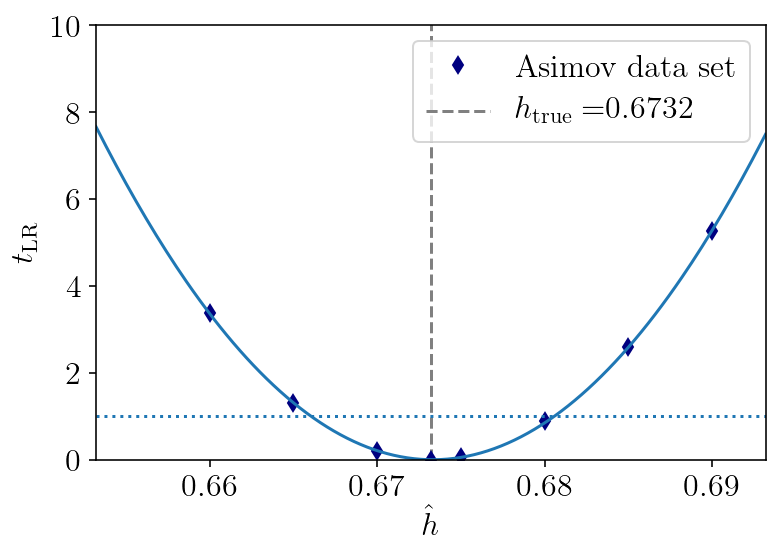

In [13]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, hs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = h_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.60,0.70])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Plot
plt.plot(hs_asimov, chi2_asimov, marker="d", ls="", color="navy", label="Asimov data set")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(h_true, 0, 20, color="grey", ls="--", label=r"$h_\mathrm{true} = $"+str(h_true))
plt.axhline(1, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(r"$\hat h$")
plt.ylim([0,10])
plt.xlim([h_true-h_lim, h_true+h_lim])
plt.legend()
plt.savefig("PL_asimov_h.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [14]:
# Adopt x bins
h_lim = 4*sigma_asimov
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

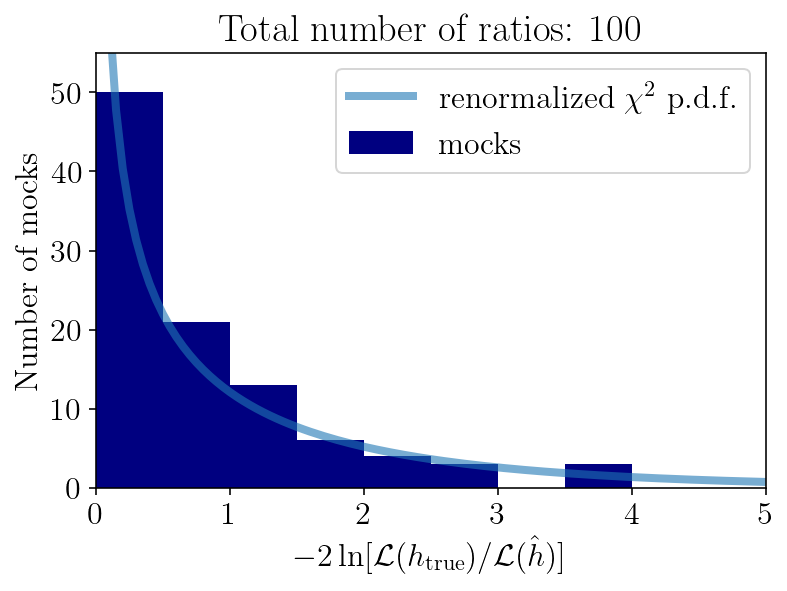

In [15]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="mocks")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,55])
plt.xlabel(r"$-2\ln[{\mathcal{L}(h_\mathrm{true})}/{\mathcal{L}(\hat{h})}]$")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

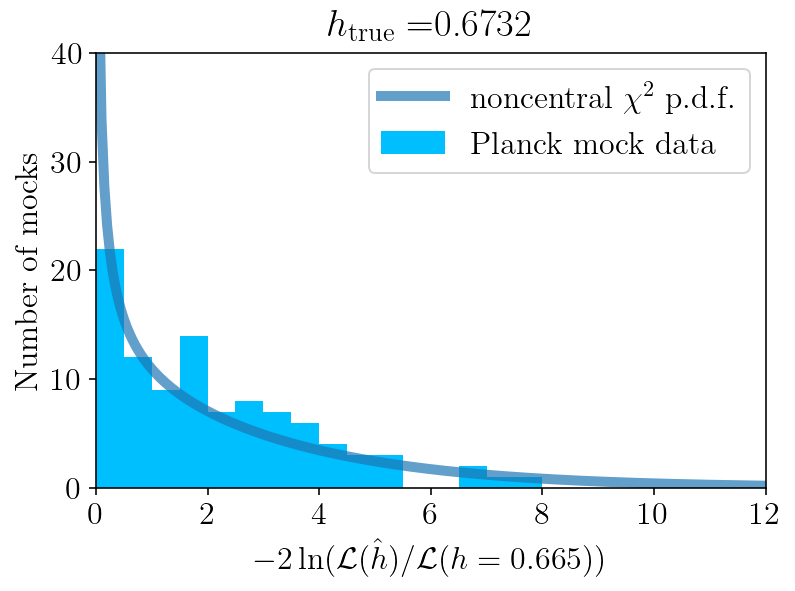

In [17]:
# Plot noncentral histogram
plt.hist(LR_NC, bins=bins_alt, color="deepskyblue", label="Planck mock data")
plt.plot(bins_fine_alt, norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), color="tab:blue", lw=5, alpha=0.7, label=r'noncentral $\chi^2$ p.d.f.')
plt.xlim([0,bin_max_alt])
plt.ylim([0,40])
plt.xlabel(r"$-2\ln(\mathcal{L}(\hat{h})/\mathcal{L}(h="+str(h_alt)+"))$")
plt.ylabel("Number of mocks")
plt.legend()
plt.title(r"$h_\mathrm{true}= $"+str(h_true))
plt.show()

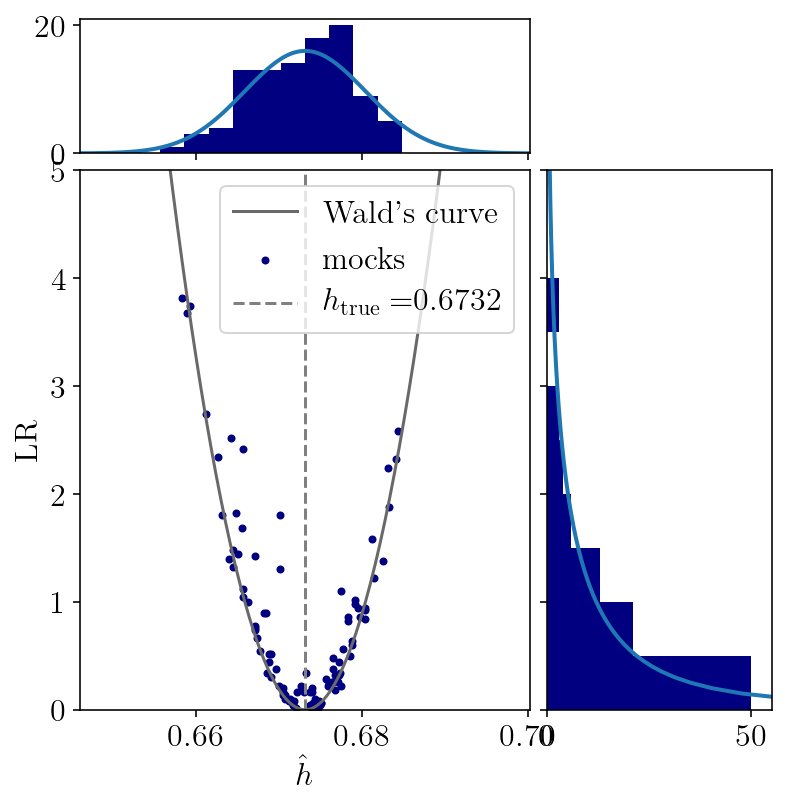

In [19]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR, color="navy", marker=".", label=r"mocks")
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='dimgrey', ls='-', label="Wald's curve")
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey", label=r"$h_\mathrm{true} =$"+str(h_true))
ax.set_xlim([h_true-h_lim+0.002, h_true+h_lim-0.002])
ax.set_ylim([0,bin_max])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel("LR")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="navy", label="300 steps")
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
plt.hist(LR, bins=bins, orientation='horizontal', color="navy", label="300 steps")
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([0,55])
plt.show()

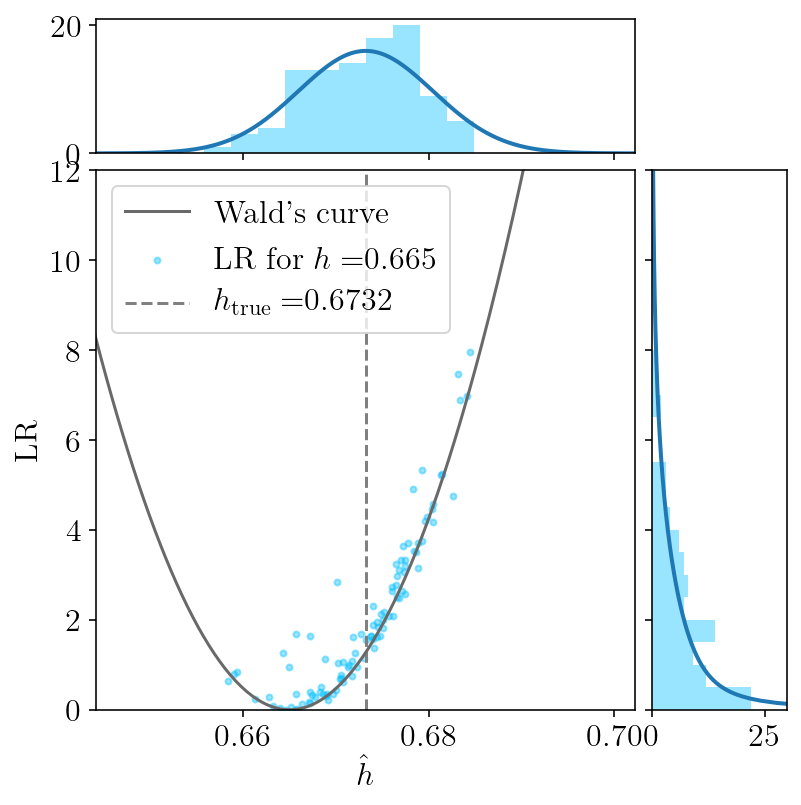

In [20]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR_NC, color="deepskyblue", alpha=0.4, marker=".", label=r"LR for $h = $"+str(h_alt))
ax.plot(h_bins_fine-(h_true-h_alt), (h_bins_fine-h_true)**2/sigma_asimov**2, color='dimgrey', ls='-', label="Wald's curve")
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey", label=r"$h_\mathrm{true} = $"+str(h_true))
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel("LR")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="deepskyblue", alpha=0.4)
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2, label=r'$\chi^2$ p.d.f.')

# Hist y
ax_histy.hist(LR_NC, bins=bins_alt, orientation='horizontal', color="deepskyblue", alpha=0.4)
ax_histy.plot(norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), bins_fine_alt, color='tab:blue', lw=2)
ax_histy.set_xlim([0,30])
plt.show()

In [21]:
# Adapt h bin settings
x_lim = 4*sigma_asimov

/Users/lherold/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


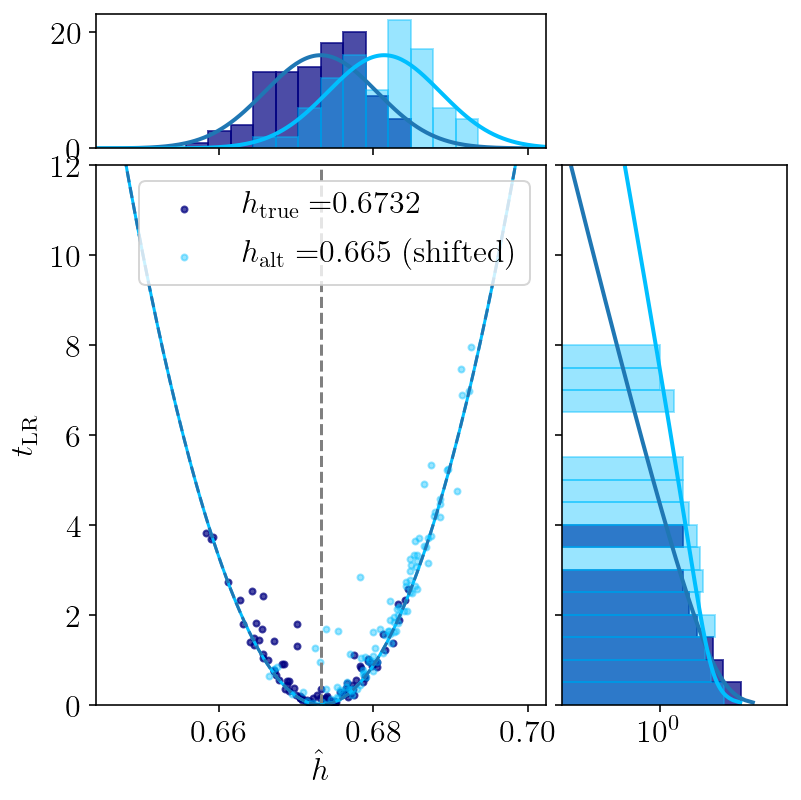

In [22]:
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR, color="navy", marker=".", label=r"$h_\mathrm{true} = $"+str(h_true), alpha=0.7)
ax.scatter(h_hat+(h_true-h_alt), LR_NC, color="deepskyblue", alpha=0.4, marker=".", label=r"$h_\mathrm{alt} = $"+str(h_alt)+" (shifted)")
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='deepskyblue', ls='-')
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='tab:blue', ls='--')

ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey")
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max_alt])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2)
ax_histx.hist(h_hat+(h_true-h_alt), bins=h_bins, color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=2*h_true-h_alt, scale=sigma_asimov), color='deepskyblue', lw=2, label=r'$\chi^2$ p.d.f.')

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.hist(LR_NC, bins=bins_alt, orientation='horizontal', color="deepskyblue", alpha=0.4, edgecolor='deepskyblue')
ax_histy.plot(norm*ncx2.pdf(bins_fine_alt, df=1, nc=(h_true-h_alt)**2/sigma_asimov**2), bins_fine_alt, color='deepskyblue', lw=2)
ax_histy.set_xscale("log")
ax_histy.set_xlim([0,450])

plt.savefig("LR_hist_varying_NP_h.pdf", bbox_inches='tight')
plt.show()

In [41]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR_cutoff = 0.93
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  0.93


In [46]:
# Find \Delta\chi^2 for which 95.45% of mocks are below
LR_cutoff = 2.55
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

95.0 % of mocks below:  2.55


In [24]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(h_hat))

sigma_asimov:  0.007268657037943493
sigma_mocks:  0.005916779296211408
